# Missing Data Imputation

### 📘 Notebook Overview

This notebook contains the process for handling missing data using **KNN imputation**, along with a comprehensive justification for why the imputation is considered valid and reliable. It includes:

---

### ▪️Checking of Missing Values 
  An initial assessment of missing data.
  
### ▪️Imputing Missing Values with KNN 
  Implementation of KNN imputation to fill in missing categorical values.

### ▪️Evaluation on KNN Missing Value Imputation
  - **Distribution Comparison Before and After Imputation Using Bar Chart**  
    Visual comparison of categorical distributions to assess the impact of imputation.
  
  - **Statistical Validation Using Cramér’s V and Eta Squared**  
    Quantitative evaluation of association strength and effect size to confirm structural consistency.
  
  - **Machine Learning Model Based Evaluation with Random Forest**  
    Analysis of the impact of imputation on model performance to validate predictive reliability.

### ▪️ Saving the imputed train and test files
---


## Checking Missing Values

In [2]:
import pandas as pd

# Load your CSVs
train_df = pd.read_csv("adult_combined_train_80.csv")
test_df = pd.read_csv("adult_combined_test_20.csv")

In [3]:
print("🔍 Train dataset:")
print(train_df.shape)
print("\nTraining Data Info:")
train_df.info()
print("\nMissing values in training data:")
print(train_df.isnull().sum())

🔍 Train dataset:
(38379, 15)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38379 entries, 0 to 38378
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             38379 non-null  int64 
 1   workclass       36184 non-null  object
 2   fnlwgt          38379 non-null  int64 
 3   education       38379 non-null  object
 4   education_num   38379 non-null  int64 
 5   marital_status  38379 non-null  object
 6   occupation      36176 non-null  object
 7   relationship    38379 non-null  object
 8   race            38379 non-null  object
 9   sex             38379 non-null  object
 10  capital_gain    38379 non-null  int64 
 11  capital_loss    38379 non-null  int64 
 12  hours_per_week  38379 non-null  int64 
 13  native_country  38379 non-null  object
 14  income          38379 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.4+ MB

Missing values in training data:
age      

In [4]:
print("\n🔍 Test dataset:")
print(test_df.shape)
print("\nTraining Data Info:")
test_df.info()
print("\nMissing values in training data:")
print(test_df.isnull().sum())


🔍 Test dataset:
(9605, 15)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9605 entries, 0 to 9604
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9605 non-null   int64 
 1   workclass       9047 non-null   object
 2   fnlwgt          9605 non-null   int64 
 3   education       9605 non-null   object
 4   education_num   9605 non-null   int64 
 5   marital_status  9605 non-null   object
 6   occupation      9045 non-null   object
 7   relationship    9605 non-null   object
 8   race            9605 non-null   object
 9   sex             9605 non-null   object
 10  capital_gain    9605 non-null   int64 
 11  capital_loss    9605 non-null   int64 
 12  hours_per_week  9605 non-null   int64 
 13  native_country  9605 non-null   object
 14  income          9605 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB

Missing values in training data:
age         

## Imputing Missing Values with KNN

> **Note:** Since the `k` parameter was not specified in the KNN imputer, the default of **5 nearest neighbors** was used for imputation.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN

# Load Datasets
train_df = pd.read_csv("adult_combined_train_80.csv")
test_df = pd.read_csv("adult_combined_test_20.csv")

# Combine for consistent encoding and imputation
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}

# Loop over columns to encode
for col_name in combined_df:
    # Create ordinal encoder for the column
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = combined_df[col_name]

    # Select the non-null values in the column
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)

    # Encode the non-null values of the column
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)

    # Replace the values in the column with ordinal values
    combined_df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

    
combined_df_KNN_imputed = combined_df.copy(deep=True)

# Create KNN imputer
KNN_imputer = KNN()

combined_df_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(combined_df))

for col_name in combined_df_KNN_imputed:
    # Reshape the values to 2-dimensions to 
    # avoid errors while storing in the DataFrame
    reshaped = combined_df_KNN_imputed[col_name].values.reshape(-1, 1)
    combined_df_KNN_imputed[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped).ravel()
    
# Separate back into train and test
train_imputed = combined_df_KNN_imputed.iloc[:len(train_df)].copy()
test_imputed = combined_df_KNN_imputed.iloc[len(train_df):].copy()

Imputing row 1/47984 with 0 missing, elapsed time: 634.360
Imputing row 101/47984 with 0 missing, elapsed time: 634.587
Imputing row 201/47984 with 0 missing, elapsed time: 634.613
Imputing row 301/47984 with 0 missing, elapsed time: 634.662
Imputing row 401/47984 with 0 missing, elapsed time: 634.675
Imputing row 501/47984 with 0 missing, elapsed time: 634.693
Imputing row 601/47984 with 0 missing, elapsed time: 634.727
Imputing row 701/47984 with 0 missing, elapsed time: 634.779
Imputing row 801/47984 with 0 missing, elapsed time: 634.793
Imputing row 901/47984 with 2 missing, elapsed time: 634.802
Imputing row 1001/47984 with 0 missing, elapsed time: 634.839
Imputing row 1101/47984 with 0 missing, elapsed time: 634.894
Imputing row 1201/47984 with 0 missing, elapsed time: 634.917
Imputing row 1301/47984 with 0 missing, elapsed time: 635.104
Imputing row 1401/47984 with 0 missing, elapsed time: 635.181
Imputing row 1501/47984 with 0 missing, elapsed time: 635.192
Imputing row 1601/47

Imputing row 13601/47984 with 0 missing, elapsed time: 637.239
Imputing row 13701/47984 with 0 missing, elapsed time: 637.247
Imputing row 13801/47984 with 0 missing, elapsed time: 637.257
Imputing row 13901/47984 with 0 missing, elapsed time: 637.273
Imputing row 14001/47984 with 0 missing, elapsed time: 637.291
Imputing row 14101/47984 with 0 missing, elapsed time: 637.310
Imputing row 14201/47984 with 0 missing, elapsed time: 637.316
Imputing row 14301/47984 with 0 missing, elapsed time: 637.348
Imputing row 14401/47984 with 0 missing, elapsed time: 637.397
Imputing row 14501/47984 with 0 missing, elapsed time: 637.415
Imputing row 14601/47984 with 0 missing, elapsed time: 637.425
Imputing row 14701/47984 with 0 missing, elapsed time: 637.461
Imputing row 14801/47984 with 0 missing, elapsed time: 637.471
Imputing row 14901/47984 with 0 missing, elapsed time: 637.483
Imputing row 15001/47984 with 0 missing, elapsed time: 637.502
Imputing row 15101/47984 with 0 missing, elapsed time: 

Imputing row 27601/47984 with 0 missing, elapsed time: 639.125
Imputing row 27701/47984 with 0 missing, elapsed time: 639.137
Imputing row 27801/47984 with 2 missing, elapsed time: 639.148
Imputing row 27901/47984 with 0 missing, elapsed time: 639.163
Imputing row 28001/47984 with 0 missing, elapsed time: 639.173
Imputing row 28101/47984 with 0 missing, elapsed time: 639.197
Imputing row 28201/47984 with 0 missing, elapsed time: 639.218
Imputing row 28301/47984 with 0 missing, elapsed time: 639.226
Imputing row 28401/47984 with 0 missing, elapsed time: 639.233
Imputing row 28501/47984 with 0 missing, elapsed time: 639.250
Imputing row 28601/47984 with 0 missing, elapsed time: 639.262
Imputing row 28701/47984 with 0 missing, elapsed time: 639.271
Imputing row 28801/47984 with 0 missing, elapsed time: 639.278
Imputing row 28901/47984 with 0 missing, elapsed time: 639.293
Imputing row 29001/47984 with 0 missing, elapsed time: 639.316
Imputing row 29101/47984 with 0 missing, elapsed time: 

Imputing row 41901/47984 with 0 missing, elapsed time: 640.992
Imputing row 42001/47984 with 0 missing, elapsed time: 641.004
Imputing row 42101/47984 with 0 missing, elapsed time: 641.017
Imputing row 42201/47984 with 0 missing, elapsed time: 641.028
Imputing row 42301/47984 with 0 missing, elapsed time: 641.042
Imputing row 42401/47984 with 0 missing, elapsed time: 641.051
Imputing row 42501/47984 with 2 missing, elapsed time: 641.066
Imputing row 42601/47984 with 0 missing, elapsed time: 641.098
Imputing row 42701/47984 with 0 missing, elapsed time: 641.107
Imputing row 42801/47984 with 0 missing, elapsed time: 641.122
Imputing row 42901/47984 with 0 missing, elapsed time: 641.129
Imputing row 43001/47984 with 0 missing, elapsed time: 641.151
Imputing row 43101/47984 with 0 missing, elapsed time: 641.158
Imputing row 43201/47984 with 2 missing, elapsed time: 641.162
Imputing row 43301/47984 with 0 missing, elapsed time: 641.173
Imputing row 43401/47984 with 0 missing, elapsed time: 

In [6]:
print("🔍 Train dataset:")
print(train_imputed.shape)
print("\nTraining Data Info:")
train_imputed.info()
print("\nMissing values in training data:")
print(train_imputed.isnull().sum())

🔍 Train dataset:
(38379, 15)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38379 entries, 0 to 38378
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             38379 non-null  int64 
 1   workclass       38379 non-null  object
 2   fnlwgt          38379 non-null  int64 
 3   education       38379 non-null  object
 4   education_num   38379 non-null  int64 
 5   marital_status  38379 non-null  object
 6   occupation      38379 non-null  object
 7   relationship    38379 non-null  object
 8   race            38379 non-null  object
 9   sex             38379 non-null  object
 10  capital_gain    38379 non-null  int64 
 11  capital_loss    38379 non-null  int64 
 12  hours_per_week  38379 non-null  int64 
 13  native_country  38379 non-null  object
 14  income          38379 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.4+ MB

Missing values in training data:
age      

In [7]:
print("\n🔍 Test dataset:")
print(test_imputed.shape)
print("\nTraining Data Info:")
test_imputed.info()
print("\nMissing values in training data:")
print(test_imputed.isnull().sum())


🔍 Test dataset:
(9605, 15)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9605 entries, 38379 to 47983
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9605 non-null   int64 
 1   workclass       9605 non-null   object
 2   fnlwgt          9605 non-null   int64 
 3   education       9605 non-null   object
 4   education_num   9605 non-null   int64 
 5   marital_status  9605 non-null   object
 6   occupation      9605 non-null   object
 7   relationship    9605 non-null   object
 8   race            9605 non-null   object
 9   sex             9605 non-null   object
 10  capital_gain    9605 non-null   int64 
 11  capital_loss    9605 non-null   int64 
 12  hours_per_week  9605 non-null   int64 
 13  native_country  9605 non-null   object
 14  income          9605 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB

Missing values in training data:
age    

## Evaluation on KNN Missing Value Imputation

### Distribution comparison before and after imputation Using Bar Chart  

In [8]:
train_df = pd.read_csv("adult_combined_train_80.csv")
test_df = pd.read_csv("adult_combined_test_20.csv")
cols_to_impute = ['workclass', 'occupation']
combined_df = pd.concat([train_df, test_df], ignore_index=True)

combined_complete = combined_df.dropna(subset=cols_to_impute)

In [9]:
combined_df_imputed = pd.concat([train_imputed, test_imputed], ignore_index=True)

In [10]:
combined_complete.shape

(45221, 15)

In [11]:
combined_df_imputed.shape

(47984, 15)

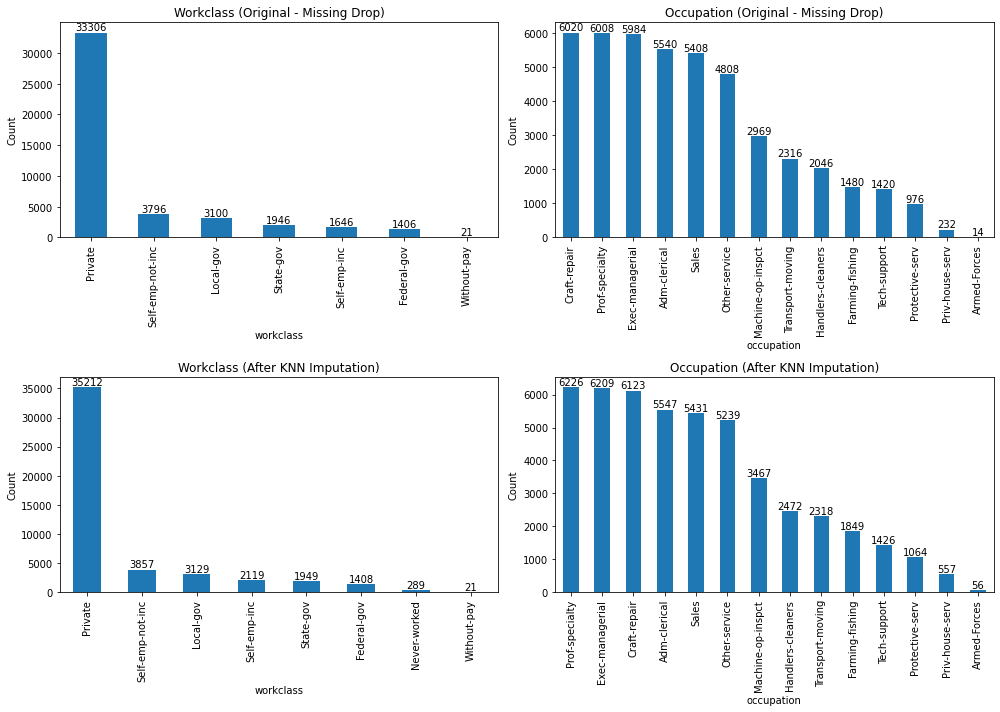

In [12]:
import matplotlib.pyplot as plt

# Helper function to add counts on top of bars
def annotate_bar(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

# Plotting bar charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Workclass - Original
combined_complete['workclass'].value_counts().plot(kind='bar', ax=axes[0, 0], title="Workclass (Original - Missing Drop)")
axes[0, 0].set_ylabel("Count")
annotate_bar(axes[0, 0])

# Occupation - Original
combined_complete['occupation'].value_counts().plot(kind='bar', ax=axes[0, 1], title="Occupation (Original - Missing Drop)")
axes[0, 1].set_ylabel("Count")
annotate_bar(axes[0, 1])

# Workclass - Imputed
combined_df_imputed['workclass'].value_counts().plot(kind='bar', ax=axes[1, 0], title="Workclass (After KNN Imputation)")
axes[1, 0].set_ylabel("Count")
annotate_bar(axes[1, 0])

# Occupation - Imputed
combined_df_imputed['occupation'].value_counts().plot(kind='bar', ax=axes[1, 1], title="Occupation (After KNN Imputation)")
axes[1, 1].set_ylabel("Count")
annotate_bar(axes[1, 1])

plt.tight_layout()
plt.show()


### 📊 Comparison of Categorical Distributions Before and After KNN Imputation

The bar charts above compare the distribution of the `workclass` and `occupation` categorical variables **before and after** KNN imputation:

- **Upper charts**: Original distributions **after dropping missing values** (`Missing Drop`).
- **Lower charts**: Distributions **after applying KNN imputation** to fill in missing values.

#### 🔍 Purpose of These Charts
These plots are used to **visually evaluate the quality of KNN imputation** by comparing the **category distribution before and after imputation**. A successful imputation should preserve the overall shape and proportions of the original data.

#### 🧪 Observations:
- The imputed data introduces **increases** in the counts of most categories.
- In the `occupation` column:
  - `Craft-repair` dropped to the **third-highest** position after imputation.
  - `Transport-moving` and `Handlers-cleaners` **swapped positions** after imputation..
- Other than these minor adjustments, **the overall distribution remains stable**.
- No extreme category shifts occurred, suggesting that **KNN imputation maintained the categorical structure effectively**.

## Statistical validation using **Cramér’s V** and **Eta Squared** 

### 📌 Understanding Cramér's V and Eta Squared

---

#### 🔷 **Cramér’s V** – *Association Between Categorical Variables*

- **What it is**: A measure of association between two **categorical variables**.
- **Range**: 0 (no association) to 1 (perfect association).
- **Interpretation  (Given by ChatGPT)**:
  - `0.0 - 0.1`: Negligible
  - `0.1 - 0.3`: Weak
  - `0.3 - 0.5`: Moderate
  - `> 0.5`: Strong
- **Usage**: Used to assess how strongly two categorical variables are related.

$$
V = \sqrt{ \frac{\chi^2}{n \cdot \min(k - 1, r - 1)} }
$$

Where:
- \( V \) = Cramér’s V (association strength)
- \( chi^2 \) = Chi-Squared statistic
- \( n \) = total number of observations
- \( k \) = number of columns in the contingency table
- \( r \) = number of rows in the contingency table

Reference link: https://www.ibm.com/docs/en/cognos-analytics/11.1.x?topic=terms-cramrs-v
(Formula from Wikipedia)

---

#### 🔷 **Eta Squared (η²)** – *Effect Size Between Categorical and Numeric Variables*

- **What it is**: A measure of **effect size** that estimates the proportion of variance in a numeric variable explained by a categorical variable.
- **Range**: 0 to 1
- **Interpretation  (Given by ChatGPT)**:
  - `~0.01`: Small effect
  - `~0.06`: Medium effect
  - `~0.14+`: Large effect
- **Usage**: Often used after Kruskal-Wallis or ANOVA tests to quantify **how much impact** a categorical variable has on a numeric variable.

**Formula (from Kruskal-Wallis H-statistic):**

$$
\eta^2 = \frac{H - k + 1}{n - k}
$$

Where:  
- \( H \) = Kruskal-Wallis test statistic  
- \( k \) = number of groups  
- \( n \) = total sample size

Reference link: https://rpkgs.datanovia.com/rstatix/reference/kruskal_effsize.html


### Before Imputation

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, kruskal

# Load DataFrame
df = combined_complete

# Identify categorical and numeric columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Columns to test
cols_to_check = ['workclass', 'occupation']

# Cramér's V helper function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Cramér's V: Categorical vs Categorical
cramers_results = []

for target in cols_to_check:
    for col in cat_cols:
        if col != target:
            v = cramers_v(df[target], df[col])
            cramers_results.append({
                'Target': target,
                'Compared With': col,
                "Cramér's V": round(v, 4)
            })

cramers_df = pd.DataFrame(cramers_results).sort_values(by=["Target", "Cramér's V"], ascending=[True, False])

# Eta Squared: Categorical vs Numeric
eta_squared_results = []

for target in cols_to_check:
    for col in num_cols:
        groups = [df[df[target] == cat][col] for cat in df[target].unique()]
        if all(len(group) > 1 for group in groups):
            h_stat, _ = kruskal(*groups)
            k = len(groups)
            n = sum([len(g) for g in groups])
            eta_sq = (h_stat - k + 1) / (n - k)
            eta_squared_results.append({
                'Target': target,
                'Compared With': col,
                'Eta Squared': round(eta_sq, 4)
            })

eta_df = pd.DataFrame(eta_squared_results).sort_values(by=["Target", "Eta Squared"], ascending=[True, False])

# Display Results
print("\n🔗 Cramér's V Before Imputation (Categorical vs Categorical):")
display(cramers_df)

print("\n📏 Eta Squared Before Imputation (Categorical vs Numeric):")
display(eta_df)


🔗 Cramér's V Before Imputation (Categorical vs Categorical):


,Target,Compared With,Cramér's V
13,occupation,sex,0.4357
15,occupation,income,0.3460
8,occupation,workclass,0.2169
9,occupation,education,0.1967
11,occupation,relationship,0.1770
10,occupation,marital_status,0.1304
12,occupation,race,0.0818
14,occupation,native_country,0.0726
2,workclass,occupation,0.2169
7,workclass,income,0.1634



📏 Eta Squared Before Imputation (Categorical vs Numeric):


,Target,Compared With,Eta Squared
8,occupation,education_num,0.3351
11,occupation,hours_per_week,0.0936
6,occupation,age,0.0433
9,occupation,capital_gain,0.0155
10,occupation,capital_loss,0.0066
7,occupation,fnlwgt,0.0030
0,workclass,age,0.0524
2,workclass,education_num,0.0356
5,workclass,hours_per_week,0.0247
3,workclass,capital_gain,0.0057


### After Imputation

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, kruskal

# Load DataFrame
df = combined_df_imputed

# Identify categorical and numeric columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Columns to test
cols_to_check = ['workclass', 'occupation']

# Cramér's V helper function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Cramér's V: Categorical vs Categorical
cramers_results = []

for target in cols_to_check:
    for col in cat_cols:
        if col != target:
            v = cramers_v(df[target], df[col])
            cramers_results.append({
                'Target': target,
                'Compared With': col,
                "Cramér's V": round(v, 4)
            })

cramers_df = pd.DataFrame(cramers_results).sort_values(by=["Target", "Cramér's V"], ascending=[True, False])

# Eta Squared: Categorical vs Numeric
eta_squared_results = []

for target in cols_to_check:
    for col in num_cols:
        groups = [df[df[target] == cat][col] for cat in df[target].unique()]
        if all(len(group) > 1 for group in groups):
            h_stat, _ = kruskal(*groups)
            k = len(groups)
            n = sum([len(g) for g in groups])
            eta_sq = (h_stat - k + 1) / (n - k)
            eta_squared_results.append({
                'Target': target,
                'Compared With': col,
                'Eta Squared': round(eta_sq, 4)
            })

eta_df = pd.DataFrame(eta_squared_results).sort_values(by=["Target", "Eta Squared"], ascending=[True, False])

# Display Results
print("\n🔗 Cramér's V After Imputation (Categorical vs Categorical):")
display(cramers_df)

print("\n📏 Eta Squared After Imputation (Categorical vs Numeric):")
display(eta_df)


🔗 Cramér's V After Imputation (Categorical vs Categorical):


,Target,Compared With,Cramér's V
13,occupation,sex,0.4076
15,occupation,income,0.3402
8,occupation,workclass,0.1904
9,occupation,education,0.1885
11,occupation,relationship,0.1693
10,occupation,marital_status,0.1242
12,occupation,race,0.0765
14,occupation,native_country,0.0627
2,workclass,occupation,0.1904
7,workclass,income,0.1444



📏 Eta Squared After Imputation (Categorical vs Numeric):


,Target,Compared With,Eta Squared
8,occupation,education_num,0.3060
11,occupation,hours_per_week,0.0897
6,occupation,age,0.0371
9,occupation,capital_gain,0.0144
10,occupation,capital_loss,0.0062
7,occupation,fnlwgt,0.0021
0,workclass,age,0.0507
2,workclass,education_num,0.0330
5,workclass,hours_per_week,0.0165
3,workclass,capital_gain,0.0043


### 📊 Comparison of Statistical Significance Before and After KNN Imputation 

To validate the quality of KNN imputation beyond visual inspection, statistical association measures were computed:

- **Cramér’s V** was used to assess the strength of association between imputed categorical variables (`workclass`, `occupation`) and other categorical features using Chi-Squared test.
- **Eta Squared (η²)** was calculated to measure the effect size between imputed categorical variables (`workclass`, `occupation`) and numerical features using the Kruskal-Wallis test.

#### 🧪 Observations:
- The **overall pattern (order) of significant relationships** was **preserved** after KNN imputation.
- Most associations showed **only slight increases or decreases** in Cramér’s V and η² values.
- This confirms that the imputed values are **consistent with the original dataset's statistical relationships**.


## Machine Learning Model Evaluation with Random Forest

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming your dataframes are already loaded as:
# combined_complete and combined_df_imputed

def build_and_evaluate_rf_model(df, label_column='income'):
    # Separate features and target
    X = df.drop(columns=[label_column])
    y = df[label_column]

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define preprocessing for categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'  # Leave numerical columns unchanged
    )

    # Create pipeline with preprocessing and Random Forest model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    # Train model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Run the function for both datasets
accuracy_complete = build_and_evaluate_rf_model(combined_complete)
accuracy_imputed = build_and_evaluate_rf_model(combined_df_imputed)

print(f"Accuracy for combined_complete: {accuracy_complete:.4f}")
print(f"Accuracy for combined_df_imputed: {accuracy_imputed:.4f}")


Accuracy for combined_complete: 0.8493
Accuracy for combined_df_imputed: 0.8514


### 📊 Comparison of Model Accuracy Before and After KNN Imputation

To evaluate the impact of missing value imputation on model performance, two Random Forest classifiers were trained:

- One using the **`combined_complete`** dataset (only rows with no missing values).
- Another using the **`combined_df_imputed`** dataset (where missing values were imputed).

The resulting accuracy scores were:

- **`combined_complete`**: 0.8493  
- **`combined_df_imputed`**: 0.8515

#### 🧪 Observations:

The accuracy of the model trained on the imputed dataset was slightly **higher** than that of the model trained on the complete-case dataset. This suggests that the imputation method used was **effective** and did **not degrade model performance**. In fact, by utilizing a larger dataset (with imputed values), the model may have achieved **better generalization**.


## Saving the imputed train and test files

In [16]:
train_imputed.to_csv("adult_combined_train_80_imputed.csv", index=False)
test_imputed.to_csv("adult_combined_test_20_imputed.csv", index=False)

print("✅ Files have been saved successfully.")

✅ Files have been saved successfully.
